# Импорт библиотек

In [57]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.datasets import load_iris, load_boston, load_wine
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

In [58]:
data = pd.read_csv('economic.csv')
data.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [59]:
data.shape

(186, 34)

In [60]:
data.dtypes

CountryID                        int64
Country Name                    object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
2019 Score                     float64
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Country                         object
Population (Millions)    

Посмотрим, есть ли пропущенные значения в данных:

In [61]:
data.isnull().sum()

CountryID                      0
Country Name                   0
WEBNAME                        0
Region                         0
World Rank                     6
Region Rank                    6
2019 Score                     6
Property Rights                1
Judical Effectiveness          1
Government Integrity           1
Tax Burden                     6
Gov't Spending                 3
Fiscal Health                  3
Business Freedom               1
Labor Freedom                  2
Monetary Freedom               2
Trade Freedom                  4
Investment Freedom             2
Financial Freedom              5
Tariff Rate (%)                4
Income Tax Rate (%)            3
Corporate Tax Rate (%)         3
Tax Burden % of GDP            7
Gov't Expenditure % of GDP     4
Country                        0
Population (Millions)          0
GDP (Billions, PPP)            1
GDP Growth Rate (%)            2
5 Year GDP Growth Rate (%)     3
GDP per Capita (PPP)           2
Unemployme

In [62]:
data.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

Удалим все пропуски в данных

In [63]:
data = data.dropna()

In [64]:
data.isnull().sum()

CountryID                      0
Country Name                   0
WEBNAME                        0
Region                         0
World Rank                     0
Region Rank                    0
2019 Score                     0
Property Rights                0
Judical Effectiveness          0
Government Integrity           0
Tax Burden                     0
Gov't Spending                 0
Fiscal Health                  0
Business Freedom               0
Labor Freedom                  0
Monetary Freedom               0
Trade Freedom                  0
Investment Freedom             0
Financial Freedom              0
Tariff Rate (%)                0
Income Tax Rate (%)            0
Corporate Tax Rate (%)         0
Tax Burden % of GDP            0
Gov't Expenditure % of GDP     0
Country                        0
Population (Millions)          0
GDP (Billions, PPP)            0
GDP Growth Rate (%)            0
5 Year GDP Growth Rate (%)     0
GDP per Capita (PPP)           0
Unemployme

# Анализ данных

Анализ данных начнем с построения матрицы корреляций:

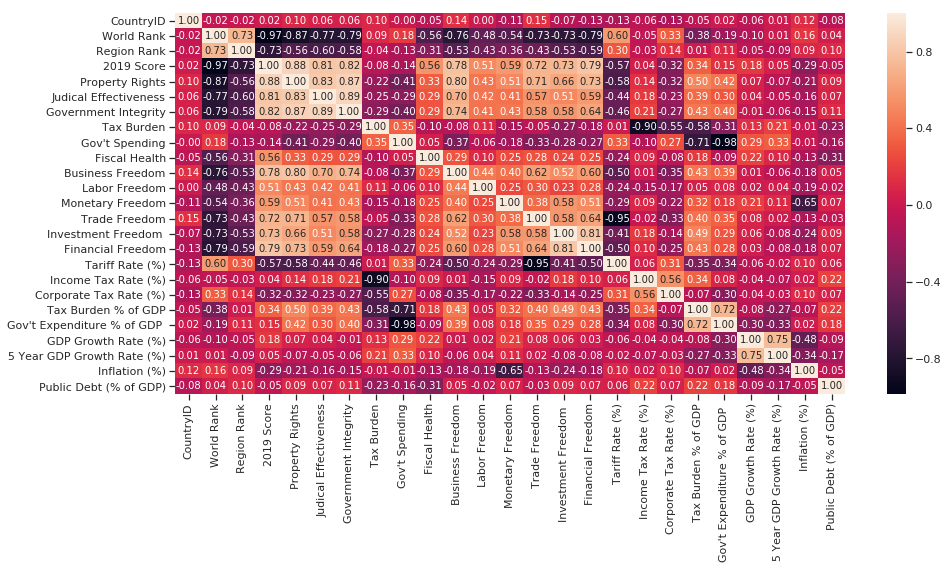

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Посмотрим более детально на следующие признаки:
* 2019 Score
* Property Rights
* Judical Effectiveness
* Government Integrity
* Business Freedom
* Monetary Freedom
* Trade Freedom
* Investment Freedom
* Financial Freedom

In [66]:
data = data[[
    '2019 Score',
    'Property Rights',
    'Judical Effectiveness',
    'Government Integrity',
    'Business Freedom',
    'Monetary Freedom',
    'Trade Freedom',
    'Investment Freedom ',
    'Financial Freedom',
]]
data.head()

,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Business Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,51.5,19.6,29.6,25.2,49.2,76.7,66.0,10.0,10.0
1,66.5,54.8,30.6,40.4,69.3,81.5,87.8,70.0,70.0
2,46.2,31.6,36.2,28.9,61.6,74.9,67.4,30.0,30.0
3,50.6,35.9,26.6,20.5,55.7,55.4,61.2,30.0,40.0
4,52.2,47.8,44.5,33.5,56.4,60.2,70.0,55.0,60.0


In [187]:
datanum = (data - data.mean()) / data.std()

In [189]:
datanum.head()

,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Business Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,-0.957088,-1.766156,-0.931676,-0.857433,-1.050894,0.107070,-0.833422,-2.269423,-2.095681
1,0.500535,0.064389,-0.875023,-0.094574,0.309899,0.612248,1.180267,0.533267,1.075335
2,-1.472114,-1.142107,-0.557761,-0.671737,-0.211400,-0.082371,-0.704102,-1.335193,-1.038676
3,-1.044545,-0.918489,-1.101638,-1.093316,-0.610836,-2.134655,-1.276803,-1.335193,-0.510173
4,-0.889065,-0.299640,-0.087535,-0.440872,-0.563446,-1.629477,-0.463938,-0.167405,0.546832


In [195]:
data = datanum

Теперь у нас есть только подходящие данные для анализа. Еще раз посмотрим на матрицу корреляций

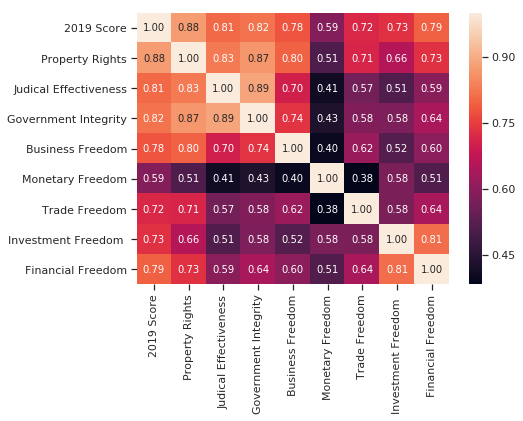

In [196]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Диаграмма рассеиваний показывает зависимость двух признаков:

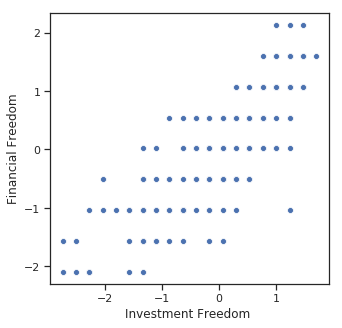

In [197]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='Investment Freedom ', y='Financial Freedom', data=data)

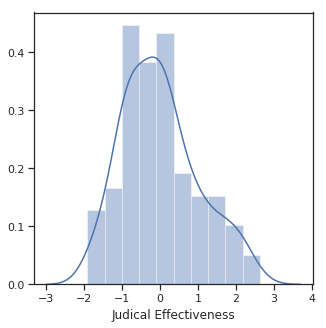

In [198]:
#Гистограмма Позволяет оценить плотность вероятности распределения данных
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(data['Judical Effectiveness'])

Можем посмотреть, как все признаки зависят между собой

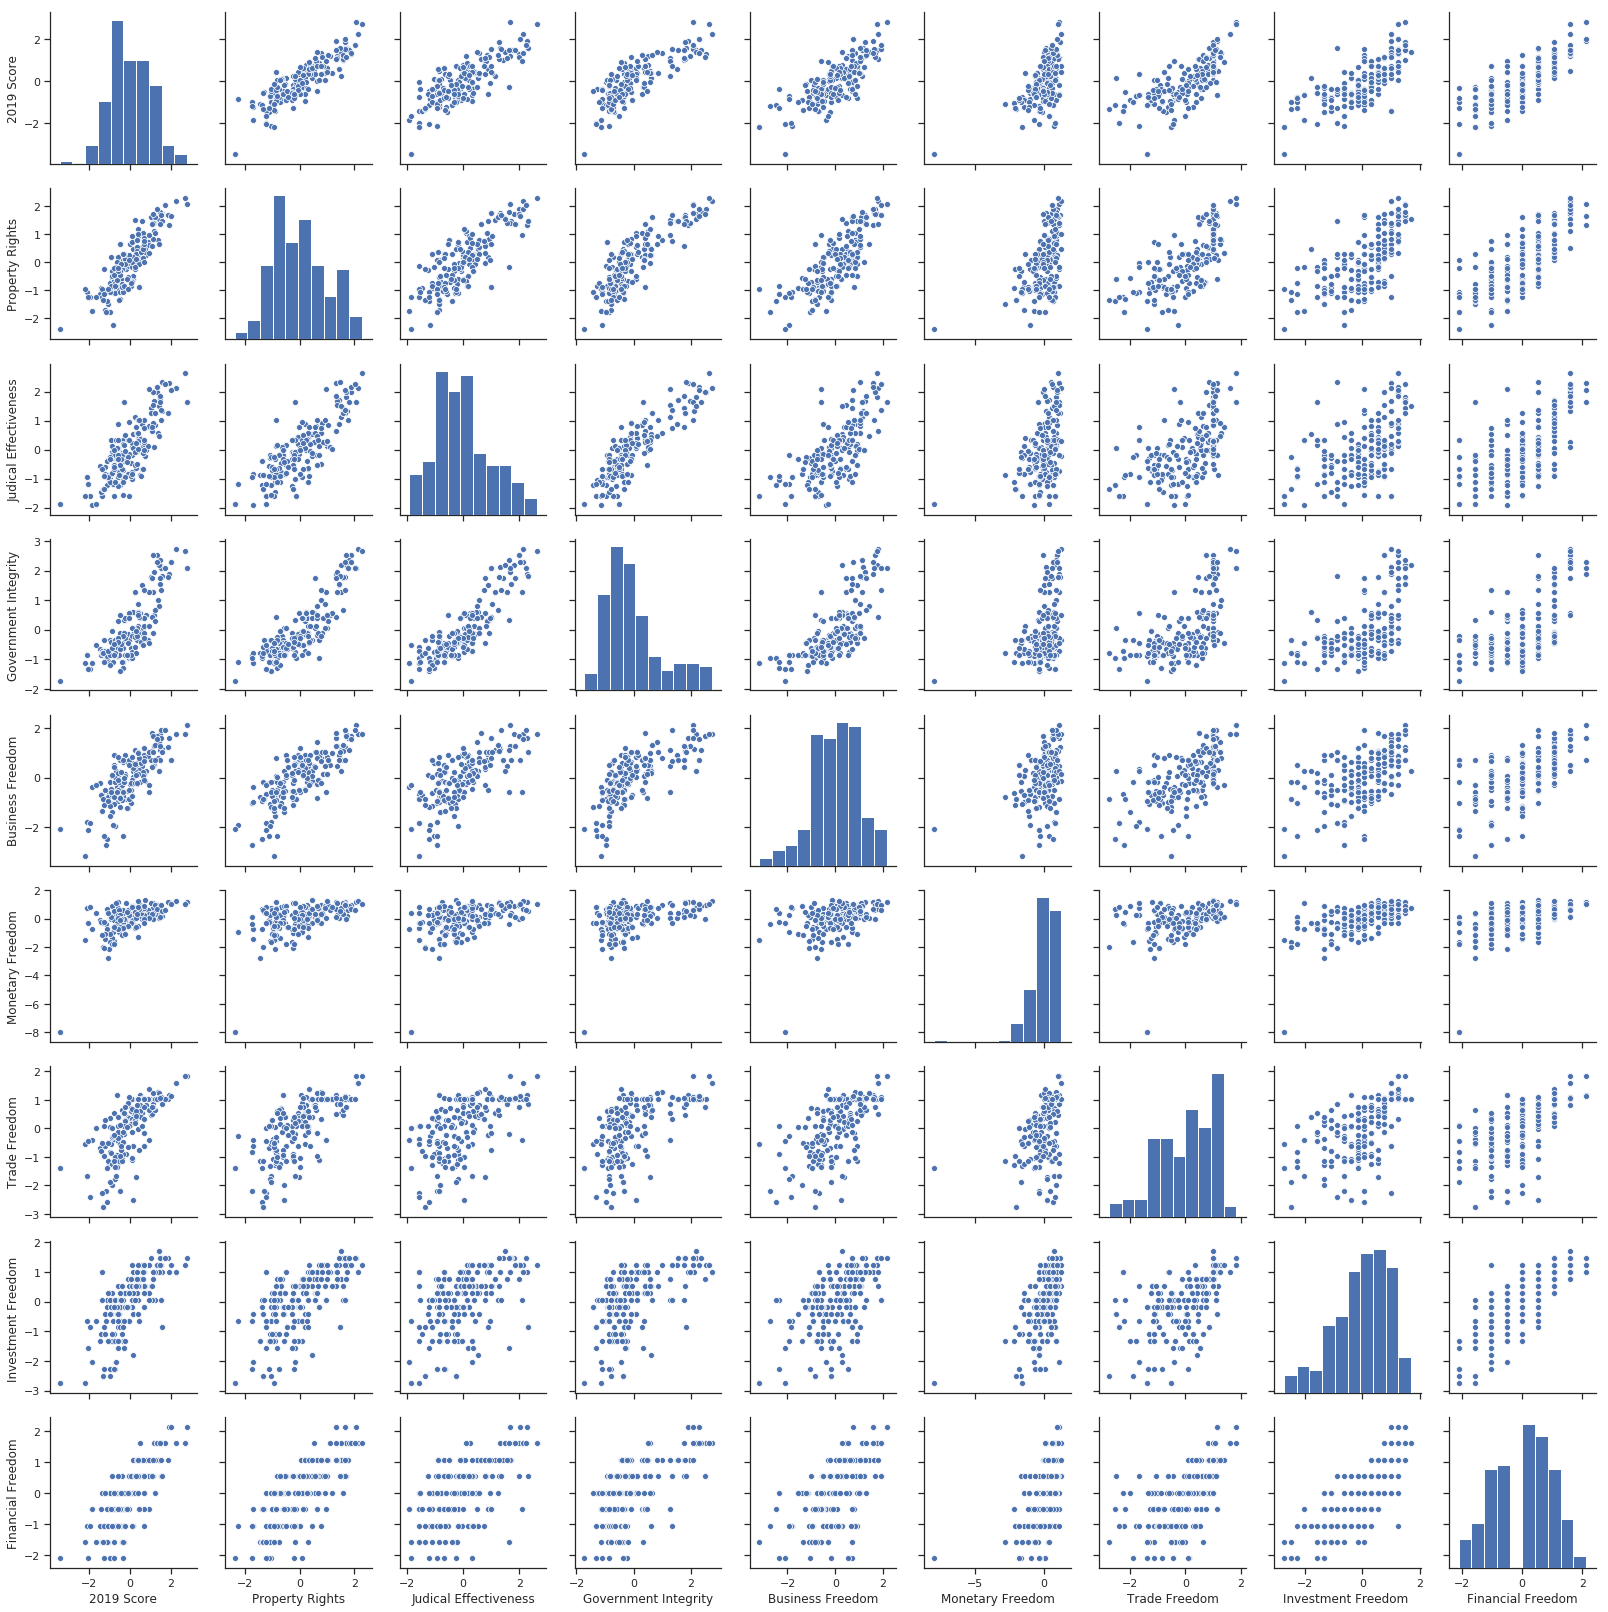

In [199]:
sns.pairplot(data)

Заметно, что многие данные находятся в линейной зависимости

# Разделение выборки

Для начала разделим целевой признак от остальных:

In [200]:
data_x = data[[
    '2019 Score',
    'Property Rights',
    'Judical Effectiveness',
    'Government Integrity',
    'Business Freedom',
    'Monetary Freedom',
    'Trade Freedom',
    'Investment Freedom ',
]]
data_y = data[['Financial Freedom']]

И теперь разделим данные на тренировочную и тестовую выборки, в тренировочной оставим около 70% от всех данных

In [201]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data_x, data_y, test_size=0.3, random_state=1)
data_X_train.shape, data_X_test.shape

((121, 8), (52, 8))

# Метод ближайших соседей

Начнем с одного из самых простых методов.

Сначала попробуем обучать на основе двух ближайших соседей

In [202]:
KNN_1 = KNeighborsRegressor(n_neighbors=2)
KNN_1.fit(data_X_train, data_y_train)
target_KNN_1 = KNN_1.predict(data_X_test)
target_KNN_1

array([[ 1.07533503],
       [ 0.28258094],
       [-0.24592179],
       [ 0.28258094],
       [-1.03867589],
       [ 0.28258094],
       [ 0.5468323 ],
       [ 1.07533503],
       [ 0.01832957],
       [ 1.60383776],
       [-0.51017316],
       [-0.51017316],
       [ 0.01832957],
       [ 0.28258094],
       [-0.77442452],
       [ 0.28258094],
       [ 1.3395864 ],
       [ 0.81108367],
       [ 0.81108367],
       [-0.77442452],
       [-1.56717861],
       [-1.30292725],
       [-1.03867589],
       [-0.77442452],
       [ 0.28258094],
       [ 0.28258094],
       [-1.30292725],
       [ 1.07533503],
       [-0.51017316],
       [-2.09568134],
       [-0.51017316],
       [-0.51017316],
       [-1.03867589],
       [ 0.01832957],
       [ 0.5468323 ],
       [-0.51017316],
       [-0.24592179],
       [ 0.01832957],
       [ 0.81108367],
       [ 0.28258094],
       [-0.51017316],
       [ 0.01832957],
       [ 1.3395864 ],
       [ 1.3395864 ],
       [ 1.86808913],
       [ 1

In [203]:
#средняя абсолютная ошибка при 2 сосядях
mean_absolute_error(data_y_test, target_KNN_1)

0.4319493464343

In [204]:
#средняя квадратичная ошибка при 2 сосядях
mean_squared_error(data_y_test, target_KNN_1)

0.32362955587198033

In [205]:
median_absolute_error(data_y_test, target_KNN_1)

0.26425136487745426

Теперь с помощью кросс-валидации подберем гиперпараметр:

In [206]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [207]:
clf_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_absolute_error')
clf_gs.fit(data_X_train, data_y_train)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

Самый лучший результат модель покажет при 10 ближайших соседях, можем в этом убедиться:

In [208]:
clf_gs.best_params_

{'n_neighbors': 10}

In [303]:
#10 ближайших соседей
KNN_2 = KNeighborsRegressor(n_neighbors=10)
KNN_2.fit(data_X_train, data_y_train)
target_KNN_2 = KNN_2.predict(data_X_test)
target_KNN_2

array([[ 1.28673613],
       [-0.29877206],
       [-0.08737097],
       [-0.0345207 ],
       [-0.40447261],
       [-0.29877206],
       [ 0.65253285],
       [ 0.86393394],
       [-0.51017316],
       [ 1.3395864 ],
       [-0.88012507],
       [-0.35162234],
       [-0.19307152],
       [ 0.86393394],
       [-0.72157425],
       [ 0.5468323 ],
       [ 1.44528694],
       [ 0.70538312],
       [ 0.70538312],
       [-0.88012507],
       [-1.25007698],
       [-1.09152616],
       [-1.09152616],
       [-0.6158737 ],
       [ 0.01832957],
       [-0.08737097],
       [-0.88012507],
       [ 1.3395864 ],
       [-0.45732288],
       [-0.98582561],
       [-0.35162234],
       [-0.56302343],
       [-0.82727479],
       [ 0.65253285],
       [ 0.65253285],
       [-0.45732288],
       [-0.24592179],
       [ 0.59968258],
       [ 0.5468323 ],
       [-0.45732288],
       [-0.88012507],
       [-0.66872397],
       [ 1.28673613],
       [ 0.59968258],
       [ 1.39243667],
       [ 1

In [304]:
#средняя абсолютная ошибка при 10 сосядях
mean_absolute_error(data_y_test, target_KNN_2)

0.3933279931060568

In [305]:
#средняя квадратичная ошибка при 10 сосядях
mean_squared_error(data_y_test, target_KNN_2)

0.24477674458234266

In [306]:
median_absolute_error(data_y_test, target_KNN_2)

0.31710163785294504

Средняя абсолютная и квадратичная ошибка стали намного меньше

# Линейная модель

Многие данные находятся в линейной зависимости, поэтому попробуем линейную модель

In [213]:
# Аналитическое вычисление коэффициентов регрессии
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-x_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

Для начала найдем коэффициенты линейной зависимости и наглядно убедимся, насколько наша зависимость похожа на линейную

In [214]:
x_array = data[['Investment Freedom ']]
y_array = data[['Financial Freedom']]

In [215]:
df1 = pd.DataFrame(x_array)
df2 = pd.DataFrame(y_array)

In [216]:
b0, b1 = analytic_regr_coef(df1.values, df2.values)
b0, b1

(-7.808192288485293e-17, 0.8104425169235877)

In [217]:
# Вычисление значений y на основе x для регрессии
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [218]:
y_array_regr = y_regr(df1.values, b0, b1)

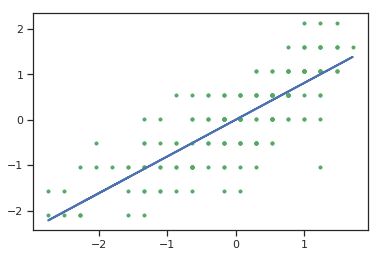

In [219]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
plt.show()

Можно посмотреть, насколько данные близко к линии. Синими отрезками показаны ошибки между истинными и предсказанными значениями

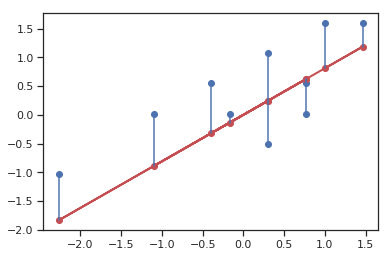

In [220]:
plt.plot(df1.values[104:114], df2.values[104:114], 'bo')
plt.plot(df1.values[104:114], y_array_regr[104:114], '-ro', linewidth=2.0)

for i in range(len(x_array[104:114])):
    x1 = df1.values[104:114][i]
    y1 = df2.values[104:114][i]
    y2 = y_array_regr[104:114][i]
    plt.plot([x1,x1],[y1,y2],'b-')

plt.show()

Попробуем обучить модель и предсказать значения:

In [221]:
reg1 = LinearRegression().fit(data_X_train, data_y_train)

In [222]:
target_LR_1 = reg1.predict(data_X_test)

In [223]:
mean_absolute_error(data_y_test, target_LR_1)

0.38262484402072616

In [224]:
median_absolute_error(data_y_test, target_LR_1)

0.3506617376006263

In [225]:
mean_squared_error(data_y_test, target_LR_1)

0.22356654516622856

И до подбора гиперпараметров наша модель показывает отличный результат

In [226]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(data_X_train, data_y_train)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [227]:
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

Кросс-валидация выбрала параметры

In [228]:
reg2 = LinearRegression(copy_X = True, fit_intercept = False, normalize = True).fit(data_X_train, data_y_train)

In [229]:
target_LR_2 = reg2.predict(data_X_test)

In [230]:
mean_absolute_error(data_y_test, target_LR_2)

0.36633352628530774

In [231]:
median_absolute_error(data_y_test, target_LR_2)

0.3185062755674042

In [232]:
mean_squared_error(data_y_test, target_LR_2)

0.2071499795476837

# Метод опорных векторов

In [233]:
xx = df1.values
yy = df2.values
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(xx.reshape(-1, 1), yy)
    y_pred = clf.predict(xx.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(xx, yy, 'b.')
    ax.plot(xx, y_pred, 'ro')
    plt.show()

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


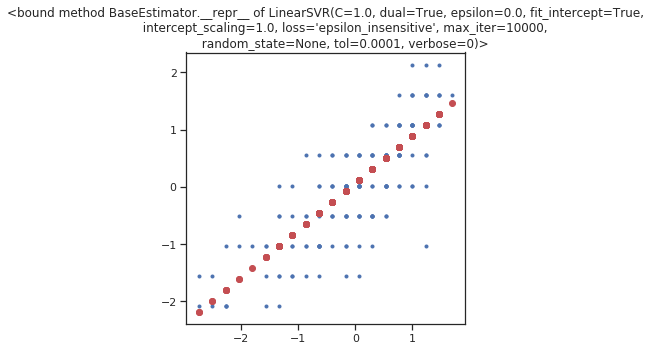

In [234]:
plot_regr(LinearSVR(C=1.0, max_iter=10000))

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


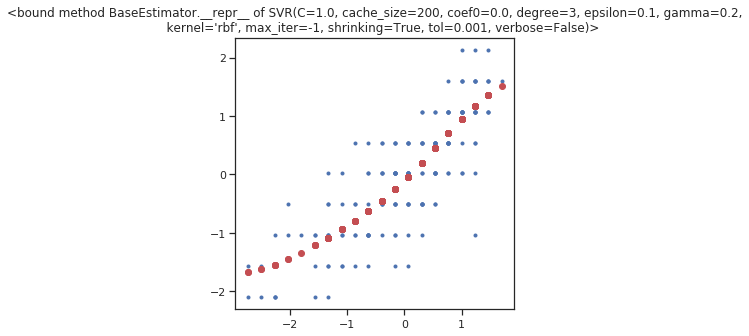

In [235]:
plot_regr(SVR(kernel='rbf', gamma=0.2, C=1.0))

In [236]:
svr_1 = SVR().fit(data_X_train, data_y_train)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [237]:
target_SVR_1 = svr_1.predict(data_X_test)

In [238]:
mean_absolute_error(data_y_test, target_SVR_1)

0.3936686915088011

In [239]:
median_absolute_error(data_y_test, target_SVR_1)

0.3632307598062585

In [240]:
mean_squared_error(data_y_test, target_SVR_1)

0.23198591093155974

In [241]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVR(),param_grid,refit = True, verbose=2)
grid.fit(data_X_train, data_y_train)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ...........

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed w

[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed w

[CV] .................... C=100, gamma=1, kernel=linear, total=   0.1s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .................... C=100, gamma=1, kernel=linear, total=   0.2s
[CV] C=100, gamma=1, kernel=linear ...................................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, gamma=1, kernel=linear, total=   0.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.1, kernel=linear .................................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed w

[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed w

[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear ...............................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed w

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed w

[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.4s
[CV] C=1000, gamma=1, kernel=linear ..................................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.1s
[CV] C=1000, gamma=1, kernel=linear ..................................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.4s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed w

[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   1.5s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   1.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   1.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed w

[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   1.5s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   1.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   1.5s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed w

[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   1.5s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   1.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   1.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   18.4s finished
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/model_se

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [242]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [243]:
svr_2 = SVR(C=100, gamma = 0.001, kernel = 'rbf').fit(data_X_train, data_y_train)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [244]:
target_SVR_2 = svr_2.predict(data_X_test)

In [245]:
mean_absolute_error(data_y_test, target_SVR_2)

0.3887834940627627

In [246]:
median_absolute_error(data_y_test, target_SVR_2)

0.3099295066199145

In [247]:
mean_squared_error(data_y_test, target_SVR_2)

0.23577551645708641

После подбора гиперпараметров метрики заметно улучшились. Посмотрим, как покажут себя более сложные модели

# Ансамблевые модели

# RandomForestRegressor

In [248]:
x_array = data[[
    '2019 Score',
    'Property Rights',
    'Judical Effectiveness',
    'Government Integrity',
    'Business Freedom',
    'Monetary Freedom',
    'Trade Freedom',
    'Investment Freedom ',
]]
y_array = data[['Financial Freedom']]

df1 = pd.DataFrame(x_array)
df2 = pd.DataFrame(y_array)

In [249]:
rf_rg_1 = RandomForestRegressor(random_state=1)
rf_rg_1.fit(data_X_train, data_y_train)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [250]:
target_RFR_1 = rf_rg_1.predict(data_X_test)

In [251]:
mean_absolute_error(data_y_test, target_RFR_1)

0.4451619146781728

In [252]:
median_absolute_error(data_y_test, target_RFR_1)

0.3963770473161813

In [253]:
mean_squared_error(data_y_test, target_RFR_1)

0.28919859399414816

In [353]:
tuned_parameters = {'n_estimators': [20, 400, 500, 700, 1000], 'max_depth': [None, 1, 2, 3, 4]}

In [354]:
CV_rfr = GridSearchCV(RandomForestRegressor(), param_grid=tuned_parameters, cv=5, n_jobs=-1, verbose=1)

In [355]:
CV_rfr.fit(data_X_train, data_y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    9.0s finished
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4],


In [356]:
CV_rfr.best_params_

{'max_depth': None, 'n_estimators': 1000}

In [357]:
rf_rg_2 = RandomForestRegressor(max_depth = None, n_estimators = 1000)
rf_rg_2.fit(data_X_train, data_y_train)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [358]:
target_RFR_2 = rf_rg_2.predict(data_X_test)

In [359]:
mean_absolute_error(data_y_test, target_RFR_2)

0.42434703793705625

In [360]:
median_absolute_error(data_y_test,  target_RFR_2)

0.3937345336674074

In [361]:
mean_squared_error(data_y_test,  target_RFR_2)

0.2561962860621142

# AdaBoost

In [263]:
ab_1 = AdaBoostRegressor(random_state=1, base_estimator = RandomForestRegressor(random_state=1, max_depth = 3, n_estimators = 500))
ab_1.fit(data_X_train, data_y_train)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=500,
                                                       n_jobs=None,
                                                       oob_score=False,
                          

In [264]:
target_AB_1 = ab_1.predict(data_X_test)

In [265]:
mean_absolute_error(data_y_test, target_AB_1)

0.4367946378188352

In [266]:
median_absolute_error(data_y_test, target_AB_1)

0.3832119409535854

In [267]:
mean_squared_error(data_y_test, target_AB_1)

0.2760429763344625

In [268]:
parameters = {'n_estimators': (1, 2), 'base_estimator__max_depth': (1, 2)}

In [269]:
CV_ab = GridSearchCV(ab_1, parameters)

In [270]:
CV_ab.fit(data_X_train, data_y_train)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d arr

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                                              criterion='mse',
                                                                              max_depth=3,
                                                                              max_features='auto',
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                            

In [271]:
CV_ab.best_params_

{'base_estimator__max_depth': 2, 'n_estimators': 1}

In [272]:
ab_2 = AdaBoostRegressor(random_state=1, base_estimator = rf_rg_2, n_estimators = 1)
ab_2.fit(data_X_train, data_y_train)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=500,
                                                       n_jobs=None,
                                                       oob_score=False,
                          

In [273]:
target_AB_2 = ab_2.predict(data_X_test)

In [274]:
mean_absolute_error(data_y_test, target_AB_2)

0.4314216285251954

In [275]:
median_absolute_error(data_y_test, target_AB_2)

0.37344567901595277

In [276]:
mean_squared_error(data_y_test, target_AB_2)

0.2990758252083404

# Метод группового учета аргументов

In [362]:
from gmdhpy import gmdh 

In [363]:
from gmdhpy.gmdh import MultilayerGMDH
gmdh_1 = MultilayerGMDH()

In [364]:
gmdh_1.fit(data_X_train, data_y_train)
target_GMDH_1 = gmdh_1.predict(data_X_test)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/gmdhpy/data_preprocessing.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/gmdhpy/data_preprocessing.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_y = data_y.as_matrix()


train layer0 in 0.03 sec
train layer1 in 0.11 sec
train layer2 in 0.09 sec
train layer3 in 0.10 sec
train layer4 in 0.09 sec
train layer5 in 0.08 sec
train layer6 in 0.09 sec
train layer7 in 0.08 sec
train layer8 in 0.08 sec
train layer9 in 0.09 sec
train layer10 in 0.09 sec


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/gmdhpy/data_preprocessing.py:60: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()


In [365]:
mean_absolute_error(data_y_test, target_GMDH_1)

0.37315189802513715

In [366]:
median_absolute_error(data_y_test, target_GMDH_1)

0.34895494637818597

In [367]:
mean_squared_error(data_y_test, target_GMDH_1)

0.22163823118915887

In [368]:
gmdh_2 = MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 'cubic', 'linear'))
gmdh_2.fit(data_X_train, data_y_train)
target_GMDH_2 = gmdh_2.predict(data_X_test)

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/gmdhpy/data_preprocessing.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()
/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/gmdhpy/data_preprocessing.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_y = data_y.as_matrix()


train layer0 in 0.13 sec
train layer1 in 0.47 sec
train layer2 in 0.42 sec
train layer3 in 0.42 sec
train layer4 in 0.41 sec
train layer5 in 0.42 sec
train layer6 in 0.46 sec
train layer7 in 0.41 sec
train layer8 in 0.41 sec
train layer9 in 0.41 sec
train layer10 in 0.41 sec
train layer11 in 0.41 sec


/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/gmdhpy/data_preprocessing.py:60: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_x = data_x.as_matrix()


In [369]:
mean_absolute_error(data_y_test, target_GMDH_2)

0.4094992950098634

In [370]:
median_absolute_error(data_y_test, target_GMDH_2)

0.3749874931929955

In [371]:
mean_squared_error(data_y_test, target_GMDH_2)

0.25197283656092617

# Сравнительный анализ

In [307]:
#1 - KNN
#2 - Линейная
#3 - Опорные векторы
#4 - Случайный лес
#5 - AdaBoost
#6 - Метод группового учета аргументов

In [308]:
d2 = [{"model_№": 1, "model": "KNN", "mean_absolute_error" : mean_absolute_error(data_y_test, target_KNN_2), "median_absolute_error": median_absolute_error(data_y_test, target_KNN_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_KNN_2)}, {"model_№": 2, "model": "LR","mean_absolute_error" : mean_absolute_error(data_y_test, target_LR_2), "median_absolute_error": median_absolute_error(data_y_test, target_LR_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_LR_2)}, {"model_№": 3, "model": "SVR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_SVR_2), "median_absolute_error": median_absolute_error(data_y_test, target_SVR_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_SVR_2)}, {"model_№": 4, "model": "RFR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_RFR_2), "median_absolute_error": median_absolute_error(data_y_test, target_RFR_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_RFR_2)}, {"model_№": 5, "model": "AB", "mean_absolute_error" : mean_absolute_error(data_y_test, target_AB_2), "median_absolute_error": median_absolute_error(data_y_test, target_AB_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_AB_2)}, {"model_№": 6, "model": "GMDH", "mean_absolute_error" : mean_absolute_error(data_y_test, target_GMDH_2), "median_absolute_error": median_absolute_error(data_y_test, target_GMDH_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_GMDH_2)}  ]

In [309]:
dd2 = pd.DataFrame(d2)

In [310]:
print(dd2)

   mean_absolute_error  mean_squared_error  median_absolute_error model  \
0             0.393328            0.244777               0.317102   KNN   
1             0.366334            0.207150               0.318506    LR   
2             0.388783            0.235776               0.309930   SVR   
3             0.421132            0.246821               0.385248   RFR   
4             0.431422            0.299076               0.373446    AB   
5             0.409499            0.251973               0.374987  GMDH   

   model_№  
0        1  
1        2  
2        3  
3        4  
4        5  
5        6  


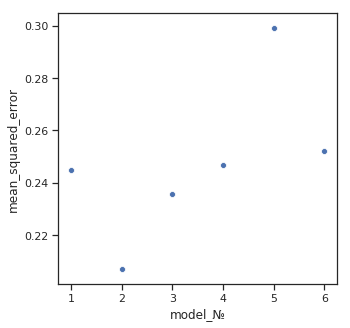

In [311]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='mean_squared_error', data=dd2)

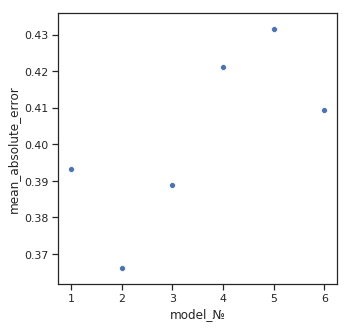

In [312]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='mean_absolute_error', data=dd2)

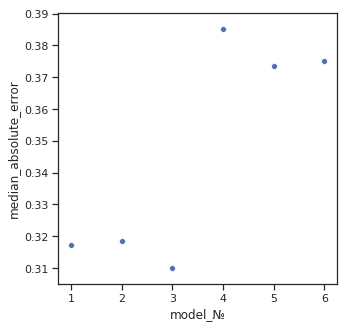

In [313]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='median_absolute_error', data=dd2)

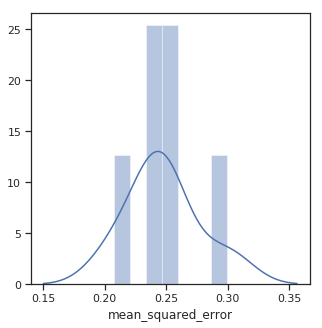

In [314]:
#Гистограмма Позволяет оценить плотность вероятности распределения данных
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['mean_squared_error'])

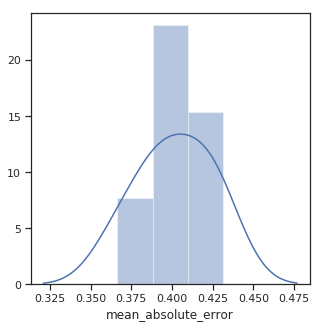

In [315]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['mean_absolute_error'])

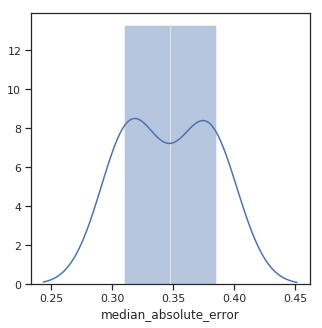

In [316]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['median_absolute_error'])

/home/vitaly/projects/uni/ml/venv/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


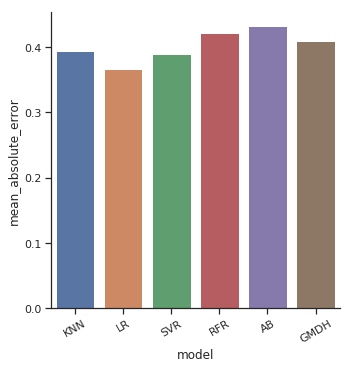

In [317]:
g = sns.factorplot(x='model'
                   ,y= 'mean_absolute_error'
                   ,data=dd2
                   ,kind='bar'
                   )
g.set_xticklabels(rotation=30)

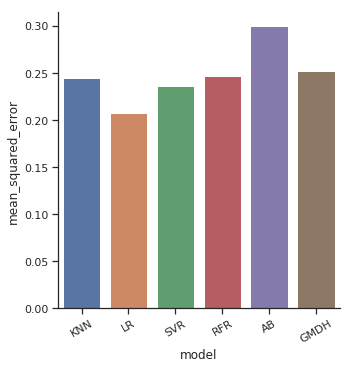

In [318]:
g = sns.factorplot(x='model'
                   ,y= 'mean_squared_error'
                   ,data=dd2
                   ,kind='bar'
                   )
g.set_xticklabels(rotation=30)

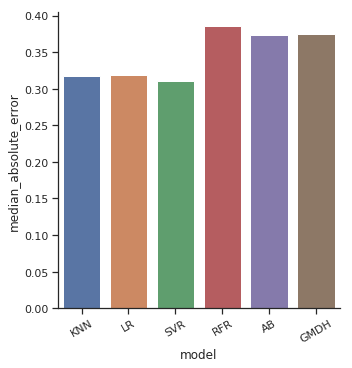

In [319]:
g = sns.factorplot(x='model'
                   ,y= 'median_absolute_error'
                   ,data=dd2
                   ,kind='bar'
                
                   )
g.set_xticklabels(rotation=30)

In [320]:
print(dd2['mean_absolute_error'].describe())

count    6.000000
mean     0.401750
std      0.023705
min      0.366334
25%      0.389920
50%      0.401414
75%      0.418224
max      0.431422
Name: mean_absolute_error, dtype: float64


In [321]:
print(dd2['median_absolute_error'].describe())

count    6.000000
mean     0.346537
std      0.034711
min      0.309930
25%      0.317453
50%      0.345976
75%      0.374602
max      0.385248
Name: median_absolute_error, dtype: float64


In [322]:
print(dd2['mean_squared_error'].describe())

count    6.000000
mean     0.247595
std      0.029845
min      0.207150
25%      0.238026
50%      0.245799
75%      0.250685
max      0.299076
Name: mean_squared_error, dtype: float64


### Вывод

Линейная модель оказалось лучшей